<a href="https://colab.research.google.com/github/PatrykCiwinski/Project_CNN_II/blob/main/CNN_beverages_model_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import os
from matplotlib.image import imread
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [23]:
data_dir = '/content/drive/MyDrive/alkohole/data'

In [24]:
os.listdir(data_dir)

['train', 'test']

In [25]:
train_path=data_dir+'/train/'
test_path=data_dir+'/test/'

In [26]:
train_path

'/content/drive/MyDrive/alkohole/data/train/'

In [27]:
bezalko_train_first = train_path+'bezalkoholowe/'+os.listdir(train_path+'/bezalkoholowe')[0]

In [28]:
bezalko_train_first

'/content/drive/MyDrive/alkohole/data/train/bezalkoholowe/bracia-sadownicy-tloczone-jablko-i-agrestem-250-ml.jpg'

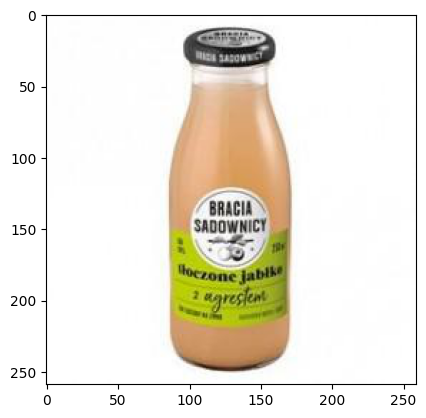

In [29]:
plt.imshow(imread(bezalko_train_first));

In [30]:
wysoko_train_first = train_path+'wysokoprocentowe/'+os.listdir(train_path+'/wysokoprocentowe')[0]

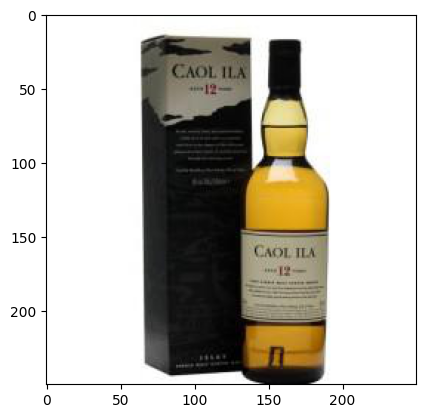

In [31]:
plt.imshow(imread(wysoko_train_first));

In [ ]:
data_path = '/content/drive/MyDrive/alkohole/data'
os.makedirs(data_path + '/test', exist_ok=True)
test_size = 0.2

for subcategory in ['bezalkoholowe', 'średnioprocentowe','wysokoprocentowe']:
  os.makedirs(data_path + '/test/' + subcategory, exist_ok=True)
  file_list = os.listdir(data_path + '/train/' + subcategory)
  number_of_samples = int(len(file_list) * test_size)
  for file_name in random.sample(file_list, number_of_samples):
    os.rename(data_path + '/train/' + subcategory + '/' + file_name,
              data_path + '/test/' + subcategory + '/' + file_name)

In [32]:
len(os.listdir(train_path + '/bezalkoholowe'))

405

In [33]:
dim1 = []
dim2 = []

for image_name in os.listdir(test_path+'/bezalkoholowe'):
    img = imread(test_path+'/bezalkoholowe/'+image_name)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [34]:
img_w = int(np.mean(dim1)//1)

In [35]:
img_h = int(np.mean(dim2)//1)

In [36]:
image_shape = (img_h,img_w,3)

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [39]:
model = Sequential()


model.add(layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(layers.Activation('relu'))
model.add(layers.Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 257, 257, 64)      1792      
                                                                 
 dropout (Dropout)           (None, 257, 257, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 128)     73856     
                                                                 
 dropout_1 (Dropout)         (None, 126, 126, 128)     0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                    

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
es = EarlyStopping(monitor='val_accuracy',patience=3)
batch_size = 6

In [43]:
image_gen = ImageDataGenerator()

In [71]:
train_image = keras.utils.image_dataset_from_directory(data_dir +'/train',
                                                    validation_split = 0.2,
                                                    seed = 0,
                                                    subset='training',
                                                    image_size=(img_h,img_w),
                                                    batch_size=batch_size,
                                                    label_mode='categorical')

Found 907 files belonging to 3 classes.
Using 726 files for training.


In [72]:
test_image = image_gen.flow_from_directory(test_path,target_size=image_shape[:2],
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           class_mode='categorical',
                                          shuffle=False)

Found 353 images belonging to 3 classes.


In [73]:
val_image = keras.utils.image_dataset_from_directory(data_dir +'/train',
                                                    validation_split = 0.2,
                                                    seed = 0,
                                                    subset='validation',
                                                    image_size=(img_h,img_w),
                                                    batch_size=batch_size,
                                                    label_mode='categorical')

Found 907 files belonging to 3 classes.
Using 181 files for validation.


In [74]:
history = model.fit(train_image, epochs=100,validation_data=val_image,
                    callbacks=[es])

Epoch 1/100
121/121 [==============================] - 38s 307ms/step - loss: 0.5030 - accuracy: 0.7727 - val_loss: 0.8737 - val_accuracy: 0.7403
Epoch 2/100
121/121 [==============================] - 8s 64ms/step - loss: 0.4303 - accuracy: 0.8320 - val_loss: 0.9547 - val_accuracy: 0.8122
Epoch 3/100
121/121 [==============================] - 7s 58ms/step - loss: 0.4197 - accuracy: 0.8815 - val_loss: 0.8610 - val_accuracy: 0.8066
Epoch 4/100
121/121 [==============================] - 8s 62ms/step - loss: 0.2779 - accuracy: 0.9063 - val_loss: 1.1513 - val_accuracy: 0.7569
Epoch 5/100
121/121 [==============================] - 8s 63ms/step - loss: 0.3693 - accuracy: 0.8623 - val_loss: 1.0339 - val_accuracy: 0.8232
Epoch 6/100
121/121 [==============================] - 7s 60ms/step - loss: 0.2326 - accuracy: 0.9063 - val_loss: 1.0923 - val_accuracy: 0.8343
Epoch 7/100
121/121 [==============================] - 8s 62ms/step - loss: 0.4206 - accuracy: 0.8802 - val_loss: 1.0464 - val_accurac

In [75]:
result = pd.DataFrame(history.history)

<Axes: >

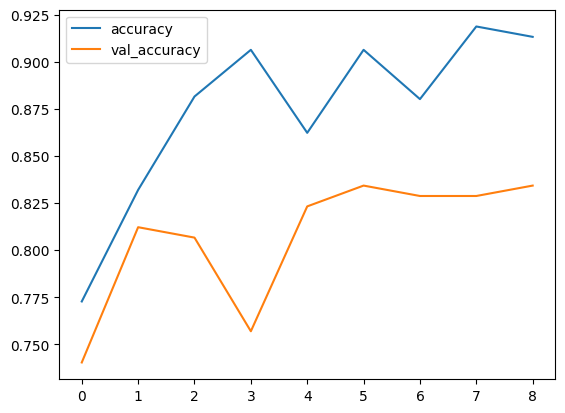

In [76]:
result[['accuracy','val_accuracy']].plot()

<Axes: >

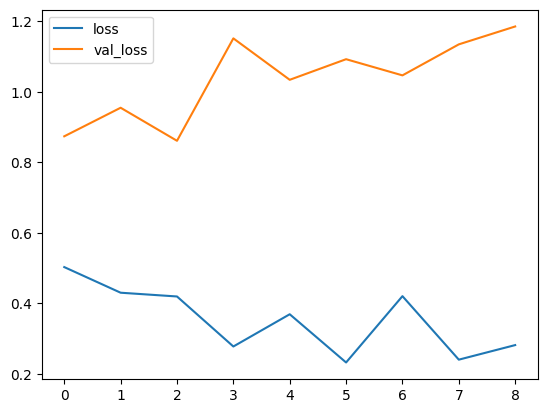

In [77]:
result[['loss','val_loss']].plot()

In [78]:
from sklearn.metrics import classification_report

In [79]:
predict = model.predict(test_image)

59/59 [==============================] - 2s 37ms/step


In [80]:
predictions=np.argmax(predict,axis=1)

In [81]:
print(classification_report(test_image.classes,predictions))

              precision    recall  f1-score   support

           0       0.66      0.95      0.78       127
           1       0.98      0.86      0.91        92
           2       0.81      0.53      0.64       134

    accuracy                           0.77       353
   macro avg       0.81      0.78      0.78       353
weighted avg       0.80      0.77      0.76       353



In [82]:
from tensorflow.keras.preprocessing import image

In [108]:
my_image = image.load_img('/content/drive/MyDrive/alkohole/data/test/bezalkoholowe/zywiol-od-zywiec-zdroj-woda-zrodlana-mocno-gazowana-05-l-12-sztuk-.jpg',target_size=(259,259,3))

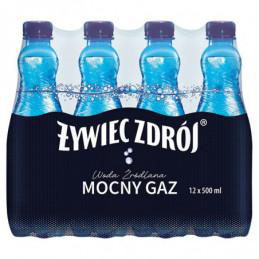

In [109]:
my_image

In [110]:
my_image = image.img_to_array(my_image)

In [111]:
my_image = np.expand_dims(my_image, axis=0)

In [112]:
my_image.shape

(1, 259, 259, 3)

In [113]:
pred_img=model.predict(my_image)

1/1 [==============================] - 0s 30ms/step


In [114]:
prediction_img=np.argmax(pred_img,axis=1)

In [115]:
prediction_img

array([0])

In [91]:
test_image.class_indices

{'bezalkoholowe': 0, 'średnioprocentowe': 1, 'wysokoprocentowe': 2}

In [ ]:
model.save('CNN_model.h5')

In [116]:
from tensorflow.keras.models import load_model

In [117]:
model2 = load_model('/content/drive/MyDrive/CNN_model.h5')


In [118]:
pred_img2=model2.predict(my_image)

1/1 [==============================] - 0s 76ms/step


In [119]:
prediction_img2=np.argmax(pred_img2,axis=1)

In [120]:
prediction_img2

array([0])